In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import random as alea
from scipy.linalg import solve,pinv,pinv2
from scipy.spatial.distance import pdist, squareform
import pandas as pd
from sklearn.decomposition import PCA
import time

In [48]:
# import nSimplices 
exec(compile(open(r"nSimplices_final.py", encoding="utf8").read(), "nSimplices_final.py", 'exec'))

# set matplotlib default savefig directory
plt.rcParams["savefig.directory"] = os.getcwd() # To save figures to directory
                                                #   defined above

Section 2.1.1: Cross dataset

In [3]:
### Prepare the dataset
df_cross = []
# for x in range(-6,7,1):
#     df_cross.append([x, 0, 0])
# for y in range(-6,7,1):
#     df_cross.append([0, y, 0])
df_cross = \
    [[-6, 0, 0], [-5, 0, 0], [-4, 0, 0], [-3, 0, 0], 
    [-2, 0, 0], [-1, 0, 0], [0, 0, 0], [1, 0, 0], 
    [2, 0, 0], [3, 0, 0], [4, 0, 0], [5, 0, 0], 
    [6, 0, 0], [0, -6, 0], [0, -5, 0], [0, -4, 0], 
    [0, -3, 0], [0, -2, 0], [0, -1, 0],  
    [0, 1, 0], [0, 2, 0], [0, 3, 0], 
    [0, 4, 0], [0, 5, 0], [0, 6, 0]]
df_cross = pd.DataFrame(df_cross)
N = df_cross.shape[0]

ori_dis=pdist(df_cross.copy()) # compute pairwise distance in data
ori_dis_sq=squareform(ori_dis) # true pairwise distance in squared form


In [4]:
# Add outliers to specific points 
# num_outliers = 3
# outlier_indices=np.sort(alea.sample(range(N),num_outliers))

# for idx in outlier_indices:
#     horsplan=alea.uniform(-100,100)
#     df_cross.loc[idx,2] = horsplan
df_cross = \
    [[-6, 0, -40], [-5, 0, 0], [-4, 0, 0], [-3, 0, 0], 
    [-2, 0, 0], [-1, 0, 0], [0, 0, 0], [1, 0, 0], 
    [2, 0, 0], [3, 0, 0], [4, 0, 0], [5, 0, 0], 
    [6, 0, 70], [0, -6, 0], [0, -5, 0], [0, -4, 50], 
    [0, -3, 0], [0, -2, 0], [0, -1, 0],  
    [0, 1, 0], [0, 2, 0], [0, 3, 0], 
    [0, 4, 0], [0, 5, 0], [0, 6, 0]]
df_cross = pd.DataFrame(df_cross)

In [5]:
### Preparing pairwise distances

""" euclidean distances """
out_dis = pdist(df_cross)
out_dis_sq = squareform(out_dis)

In [6]:

### Run nSimplices method
feature_num = 20
dim_start = 1
dim_end = df_cross.shape[1]
T1=time.time()
outlier_indices, subspace_dim, corr_dis_sq, corr_coord = nSimplices(out_dis_sq, feature_num, dim_start, dim_end, euc_coord=np.array(df_cross.copy()))
T2=time.time()
print("running time is:", T2-T1)
print("subspace dimension is:", subspace_dim)

med_height is: [3.00000000e+00 7.30004830e-08 2.95672297e-08 2.54285609e-08
 2.19842218e-08 1.97012022e-08 2.42568778e-08 2.41034804e-08
 1.88209457e-08 2.28644732e-08 2.66955265e-08 2.68212648e-08
 2.42665238e-08]
subspace_dim one is: 2
outlier indices are: [ 0 12 15]
no MDS
outliet_indices is: [ 0 12 15]
normal_mean is: [ 0.00000000e+00 -5.04322895e-36  0.00000000e+00]
original coord is: [ -6   0 -40]
proj_coord is: [-1.66426555e-34  3.15999894e-17  0.00000000e+00]
proj_coord is: [-6.  0.  0.]
+normal_mean is: [-6.00000000e+00 -5.04322895e-36  0.00000000e+00]
corr_coord is:       0             1     2
0  -6.0 -5.043229e-36   0.0
1  -5.0  0.000000e+00   0.0
2  -4.0  0.000000e+00   0.0
3  -3.0  0.000000e+00   0.0
4  -2.0  0.000000e+00   0.0
5  -1.0  0.000000e+00   0.0
6   0.0  0.000000e+00   0.0
7   1.0  0.000000e+00   0.0
8   2.0  0.000000e+00   0.0
9   3.0  0.000000e+00   0.0
10  4.0  0.000000e+00   0.0
11  5.0  0.000000e+00   0.0
12  6.0  0.000000e+00  70.0
13  0.0 -6.000000e+00   0

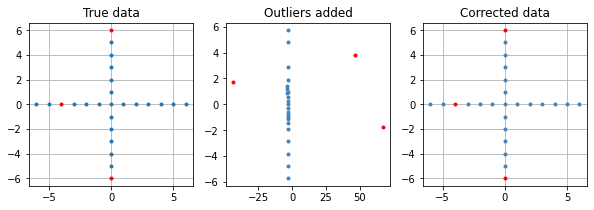

In [7]:
### Plot in 2D using the two largest eigenvalues - Fig.2

normal_indices=[i for i in range(N) if i not in outlier_indices] # list of normal points 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))

# plot original graph
va, ve, Xe = cMDS(ori_dis_sq)
ax1.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.')
ax1.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red')
ax1.set_title("True data")
ax1.grid()

# plot original graphs with outliers added 
va, ve, Xe = cMDS(out_dis_sq)
ax2.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='steelblue')
ax2.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red')
ax2.set_title("Outliers added")

# plot correct outliers 
va, ve, Xe = cMDS(corr_dis_sq)   
ax3.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='steelblue')
ax3.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red')
ax3.set_title("Corrected data")
ax3.grid()
plt.show()

Section 2.1.2: Main subspace of dimension 2

In [33]:
### test data, read in a dataset of main dimension 2
df_dim2 = pd.read_csv(r'outputs/bdd_synthetic_rdim2.csv',sep=';',header=None)
df_dim2.head()

,0,1,2,3,4,5,6
0,0.848493,8.547510,0.0,3.000198,10.000194,-0.000176,2.000149
1,-0.500857,12.968392,0.0,3.000171,9.999932,-0.000106,1.999975
2,4.780824,3.733815,0.0,3.000094,10.000122,-0.000009,1.999904
3,2.899181,8.026033,0.0,3.000380,9.999980,-0.000159,2.000013
4,-0.064487,5.714280,0.0,2.999760,10.000048,0.000125,1.999916


In [34]:
### Processing datasets and computing pairwise distances
N=df_dim2.shape[0]
ori_dis=pdist(df_dim2.copy()) # compute pairwise distance in data
ori_dis_sq=squareform(ori_dis) # true pairwise distance in squared form

In [35]:
### Add outliers
prop=0.05
num_outliers = int(np.ceil(prop*N))

# random draw of outliers 
indices=np.sort(alea.sample(range(N),num_outliers))
for n in indices:
    horsplan=alea.uniform(-100,100)
    # only add outliers to the third dimension for the visualization purpose
    print(horsplan)
    df_dim2.loc[n,2] = horsplan 
    
df_dim2.head(20)

53.216555116270456
-82.05882226101002
-91.73221251764241
-6.658155678785647
-41.30453031625485
-16.837456791977317
-84.57592261268026
3.6256122169419314
-16.279575429541865
10.110231850482833


,0,1,2,3,4,5,6
0,0.848493,8.547510,0.000000,3.000198,10.000194,-0.000176,2.000149
1,-0.500857,12.968392,0.000000,3.000171,9.999932,-0.000106,1.999975
2,4.780824,3.733815,0.000000,3.000094,10.000122,-0.000009,1.999904
3,2.899181,8.026033,53.216555,3.000380,9.999980,-0.000159,2.000013
4,-0.064487,5.714280,0.000000,2.999760,10.000048,0.000125,1.999916
5,-1.289692,13.503395,-82.058822,2.999918,10.000228,0.000125,2.000078
6,2.183735,8.291229,0.000000,2.999849,9.999990,-0.000011,2.000385
7,1.008046,8.709011,0.000000,3.000042,9.999921,0.000063,1.999841
8,0.632325,14.190863,0.000000,3.000176,9.999995,-0.000115,2.000016
9,1.513042,0.797678,0.000000,2.999667,10.000082,-0.000184,1.999889


In [36]:
### Preparing pairwise distances

""" euclidean distances """
out_dis=pdist(df_dim2) # pairwise distance in tab (with outliers added)
out_dis_sq=squareform(out_dis) # squared matrix form of D

In [37]:
### Run nSimplices method
d=20
T1=time.time()
outlier_indices,rdim,corr_dis_sq,corr_coord = nSimplices(out_dis_sq, d, dim_start = 1, dim_end = 7, euc_coord=np.array(df_dim2).copy())
T2=time.time()
print("running time is:", T2-T1)
print("subspace dimension is:", rdim)

med_height is: [2.72039872e+00 9.62987855e-04 4.62274744e-04 2.92860234e-04
 1.57980284e-04 4.40096881e-07 2.14430154e-07]
subspace_dim one is: 2
outlier indices are: [  3   5  25  71  89 126 134 138 158 175]
no MDS
outliet_indices is: [  3   5  25  71  89 126 134 138 158 175]
normal_mean is: [ 7.75468208e-05 -1.11660447e-05  0.00000000e+00  3.00001395e+00
  1.00000050e+01  3.49005166e-06  2.00000475e+00]
original coord is: [ 2.89918143e+00  8.02603307e+00  5.32165551e+01  3.00037952e+00
  9.99997995e+00 -1.58841021e-04  2.00001279e+00]
proj_coord is: [-6.08140577e-01  7.75086225e+00  0.00000000e+00  2.53927949e-05
  3.21211444e-06 -2.08547927e-06  1.27029452e-05]
proj_coord is: [ 2.89910388e+00  8.02604423e+00  0.00000000e+00 -3.86853838e-06
 -1.59879503e-05 -1.93752177e-05  1.81440563e-05]
+normal_mean is: [ 2.89918143e+00  8.02603307e+00  0.00000000e+00  3.00001008e+00
  9.99998898e+00 -1.58851660e-05  2.00002289e+00]
corr_coord is:            0          1          2         3      

outlier: [ 2.89918143e+00  8.02603307e+00  5.32165551e+01  3.00037952e+00
  9.99997995e+00 -1.58841021e-04  2.00001279e+00]
outlier: [-1.28969214e+00  1.35033954e+01 -8.20588223e+01  2.99991754e+00
  1.00002278e+01  1.24870766e-04  2.00007832e+00]
outlier: [ 5.07176840e-01  1.82926662e+01 -9.17322125e+01  2.99992908e+00
  9.99993546e+00 -5.19344194e-05  2.00032788e+00]
outlier: [ 8.01482341e-01  8.76852009e+00 -6.65815568e+00  3.00016267e+00
  9.99992441e+00  5.28619821e-05  1.99962410e+00]
outlier: [-1.00779709e+00  1.18592826e+01 -4.13045303e+01  3.00019185e+00
  9.99985879e+00 -8.41501848e-05  1.99988353e+00]
outlier: [ 4.89065130e-01  1.13864716e+01 -1.68374568e+01  3.00010281e+00
  9.99992936e+00 -1.85615068e-04  2.00000333e+00]
outlier: [ 2.66840175e-01  5.24789734e+00 -8.45759226e+01  2.99989406e+00
  9.99998575e+00  1.70801017e-04  2.00002348e+00]
outlier: [1.30826606e+00 7.29080727e+00 3.62561222e+00 3.00030017e+00
 1.00000255e+01 6.70949792e-05 2.00017664e+00]
outlier: [ 6.11

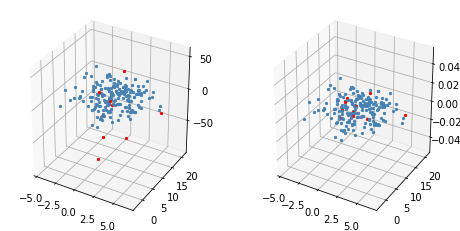

original coord is:           0          1          2         3          4         5         6
0  0.848493   8.547510   0.000000  3.000198  10.000194 -0.000176  2.000149
1 -0.500857  12.968392   0.000000  3.000171   9.999932 -0.000106  1.999975
2  4.780824   3.733815   0.000000  3.000094  10.000122 -0.000009  1.999904
3  2.899181   8.026033  53.216555  3.000380   9.999980 -0.000159  2.000013
4 -0.064487   5.714280   0.000000  2.999760  10.000048  0.000125  1.999916
5 -1.289692  13.503395 -82.058822  2.999918  10.000228  0.000125  2.000078
6  2.183735   8.291229   0.000000  2.999849   9.999990 -0.000011  2.000385
7  1.008046   8.709011   0.000000  3.000042   9.999921  0.000063  1.999841
8  0.632325  14.190863   0.000000  3.000176   9.999995 -0.000115  2.000016
9  1.513042   0.797678   0.000000  2.999667  10.000082 -0.000184  1.999889
corr_coord is:           0          1    2         3          4             5         6
0  0.848493   8.547510  0.0  3.000198  10.000194 -1.762846e-04  2.00

In [47]:
### Section 2.1.2
### Plot in 3D using the first three dimensions - Fig.3(A) 
# (TODO: combine two subfigures into one row)

ori_coord=np.array(df_dim2)

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121, projection='3d')

# plot the original coordinates

for i in range(N):
    e=ori_coord[i]
    if (i in outlier_indices):
        print("outlier:", e)
        ax1.scatter(e[0],e[1],e[2], s=5, color='red')
    else:
        ax1.scatter(e[0],e[1],e[2], s=5, color='steelblue')
# plt.show()

ax2 = fig.add_subplot(122, projection='3d')

# plot the corrected coordinates

for i in range(N):
    e=corr_coord[i]
    if (i in outlier_indices):
        print("outlier corrected:", e)
        ax2.scatter(e[0],e[1],e[2], s=5, color='red')
    else:
        ax2.scatter(e[0],e[1],e[2], s=5, color='steelblue')
plt.show() # TODO: check with Khanh： this plot doesn't look correct, the original normal points are shifted too.


print("original coord is:", df_dim2.head(10))
print("corr_coord is:", pd.DataFrame(corr_coord).head(10))


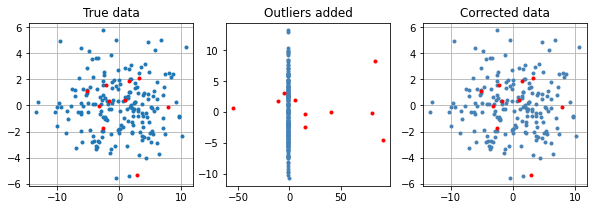

In [39]:
### Section 2.1.2
### Plot in 2D using the two largest eigenvalues - Fig.3(B) 

normal_indices=[i for i in range(N) if i not in outlier_indices] # list of normal points 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))

# plot original graph
va, ve, Xe = cMDS(ori_dis_sq)
ax1.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.')
ax1.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red')
ax1.set_title("True data")
ax1.grid()

# plot original graphs with outliers added 
va, ve, Xe = cMDS(out_dis_sq)
ax2.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='steelblue')
ax2.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red')
ax2.set_title("Outliers added")

# plot correct outliers 
va, ve, Xe = cMDS(corr_dis_sq)   
ax3.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='steelblue')
ax3.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red')
ax3.set_title("Corrected data")
ax3.grid()
plt.show()

Section 2.1.3: Main subspace of higher dimensions

In [15]:
### Prepare for section 2.1.3

### test data, read in a dataset of main dimension 10
df_dim10 = pd.read_csv(r'outputs/bdd_synthetic_rdim10.csv',sep=';',header=None)
df_dim10.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.057347,11.025471,0.974992,-1.386590,10.354453,7.933414,7.207677,18.932045,-7.129265,-1.457761,2.003568,2.004396,1.992351,2.005104,2.005256,2.000236,1.977663,1.998044,2.000330,2.005561
1,-0.138277,17.850732,-0.247049,1.655616,6.761235,10.812927,-1.392361,8.267523,3.872654,-1.215027,2.001837,1.981655,2.007377,1.997971,1.988019,2.012229,2.017667,2.007386,2.009921,1.997166
2,4.162056,15.861472,2.963909,0.035862,23.065839,18.142451,1.727768,17.986422,4.947830,5.356669,1.993498,2.004212,1.990818,1.965842,2.013454,2.009911,2.030569,1.998463,1.998052,2.029913
3,-4.908721,9.321885,8.034109,5.366603,-1.051877,-1.190321,-2.901057,7.089771,-1.150650,-0.217071,2.005735,2.004718,2.024582,2.001945,1.989926,1.971822,1.982326,1.996420,1.974038,1.978632
4,4.404126,12.613686,19.378291,3.747137,6.170001,15.936861,5.926488,26.029443,1.979592,-12.365015,1.998388,2.001630,2.021964,1.987743,2.000566,1.953058,1.960406,2.005476,2.039160,2.020069


In [16]:
ori_dis=pdist(df_dim10.copy())
ori_dis_sq=squareform(ori_dis)
N=df_dim10.shape[0]

In [17]:
### Add outliers

prop=0.05
num_outliers=int(np.ceil(prop*N))
# random draw of outliers 
outlier_indices=np.sort(alea.sample(range(N),num_outliers))
for n in outlier_indices:
    horsplan=alea.uniform(-50,50)
    
    # for each row, add outliers to one of columns 10 to 15 (inclusive)
    # columns 10 to 15 are originally simulated with Guassian(2, 0.05)
    i=alea.randint(10,15)
    df_dim10.loc[n,i] = horsplan
df_dim10.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.057347,11.025471,0.974992,-1.386590,10.354453,7.933414,7.207677,18.932045,-7.129265,-1.457761,2.003568,2.004396,1.992351,2.005104,2.005256,2.000236,1.977663,1.998044,2.000330,2.005561
1,-0.138277,17.850732,-0.247049,1.655616,6.761235,10.812927,-1.392361,8.267523,3.872654,-1.215027,2.001837,1.981655,2.007377,1.997971,1.988019,2.012229,2.017667,2.007386,2.009921,1.997166
2,4.162056,15.861472,2.963909,0.035862,23.065839,18.142451,1.727768,17.986422,4.947830,5.356669,1.993498,2.004212,1.990818,1.965842,2.013454,2.009911,2.030569,1.998463,1.998052,2.029913
3,-4.908721,9.321885,8.034109,5.366603,-1.051877,-1.190321,-2.901057,7.089771,-1.150650,-0.217071,2.005735,2.004718,2.024582,2.001945,1.989926,1.971822,1.982326,1.996420,1.974038,1.978632
4,4.404126,12.613686,19.378291,3.747137,6.170001,15.936861,5.926488,26.029443,1.979592,-12.365015,1.998388,2.001630,2.021964,1.987743,2.000566,1.953058,1.960406,2.005476,2.039160,2.020069
5,7.700336,6.607815,4.031623,-4.042828,6.971277,8.844591,5.333651,14.424024,-8.530032,-2.282335,1.998795,1.999905,2.011792,2.006573,1.995055,2.027061,1.988521,2.009872,2.034491,2.016498
6,7.256448,13.739773,1.522785,-2.287991,18.883183,-2.954543,-1.042712,10.854332,2.552797,1.232678,1.979752,1.990436,2.021515,2.034895,2.004347,2.018807,1.987976,2.003386,1.996254,1.978660
7,5.731072,9.471065,-1.672204,5.026157,2.960110,5.888912,1.641025,11.879772,-4.041202,3.331711,1.996955,2.010982,1.988754,1.991203,1.998585,1.980851,1.996916,2.000598,2.017564,2.015510
8,-3.128389,8.399628,9.665753,-0.411210,10.839125,5.777737,-0.776007,9.130144,7.371602,-4.039569,1.988544,1.988885,2.016003,2.019513,2.000316,1.984265,2.010759,1.991181,1.974081,1.965513
9,-3.611207,8.812396,4.593024,-5.233207,4.158666,-1.553874,3.166289,14.101190,-1.888744,3.372878,1.994697,1.995015,2.025902,1.974463,2.007664,1.994960,2.017156,1.996112,2.005980,1.972860


In [18]:
### Preparing pairwise distances for the dataset with outliers

""" euclidean distances """
out_dis=pdist(df_dim10)
out_dis_sq=squareform(out_dis)


In [19]:
### Run nSimplices method
d=20
T1=time.time()
outlier_indices,rdim,corr_dis_sq,corr_coord = nSimplices(out_dis_sq, d, dim_start=1, dim_end=df_dim10.shape[1], euc_coord=np.array(df_dim10))
T2=time.time()
print("running time is:", T2-T1)

med_height is: [18.17680817 16.14190505 14.57603698 13.00717979 11.91887252 10.31200784
  8.73128743  7.13783297  4.5323759   0.72919949  0.18976251  0.12491151
  0.09600557]
subspace_dim one is: 10
outlier indices are: [ 23  56  64  87 119 141 144 147 156 162]
no MDS
outliet_indices is: [ 23  56  64  87 119 141 144 147 156 162]
normal_mean is: [ 1.71584495e-03 -6.74883067e-05 -3.42226412e-04  1.02385802e-03
 -1.29281781e-03  7.84388347e-04  1.16704166e-03 -2.92370355e-03
 -2.30858338e-03 -1.67930570e-03  2.00177151e+00  2.00382928e+00
  1.99530089e+00  1.99539332e+00  1.99984452e+00  2.00839392e+00
  1.98911224e+00  1.99823719e+00  1.99456866e+00  1.99394667e+00]
original coord is: [-0.23392871  8.58987129  3.92481732  4.27303471 18.65308731  0.3937342
  8.32434272 13.21961199  2.70764568  2.73325187  1.99820226 43.47950156
  1.99447775  2.01367978  2.00756423  2.00457571  1.96363302  2.01680416
  2.0269153   2.0016125 ]
proj_coord is: [ 1.73381449e+00  6.74567231e-01 -8.65077299e-02 

In [20]:
print(rdim) 

10


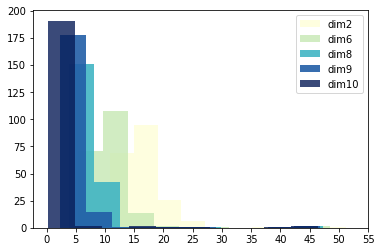

In [21]:
### Importance of dimension correction in higher dimension - Fig.4(A) height distribution 
# (TODO: not exactly the same as in the manuscript)
N=200
B=100

hcolls = []
start_dim = 2
end_dim = 15
for dim in range(start_dim, end_dim+1):
    heights = nSimplwhichh(N,out_dis_sq,dim,seed=dim+1)
    hcolls.append(heights)

blues=np.array([[255,255,217,256*0.8],[199,233,180,256*0.8], [65,182,196,256*0.9], [34,94,168,256*0.9], [8,29,88,256*0.8]])/256

plt.figure()
# select a few dimensions (i.e. 2,6,8,9,10) for demonstrating the distributions of heights
plt.hist(hcolls[2-start_dim],label='dim2',color=blues[0])
plt.hist(hcolls[6-start_dim],label='dim6',color=blues[1])
plt.hist(hcolls[8-start_dim],label='dim8',color=blues[2])
plt.hist(hcolls[9-start_dim],label='dim9',color=blues[3])
plt.hist(hcolls[10-start_dim],label='dim10',color=blues[4])

plt.xticks(np.arange(0, 60, 5))
plt.legend()
plt.show()


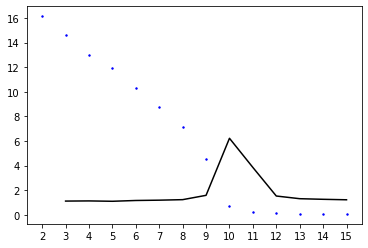

In [22]:
### Importance of dimension correction in higher dimension - Fig.4(B) dimensionality inference
# (TODO: check with Khanh, this plot does not do dimension correction)
# (TODO: not exactly the same as in the manuscript)

# calculate median heights for tested dimension from start_dim to end_dim
h_meds = []
for hcoll in hcolls:
    h_meds.append(np.median(hcoll))

# calculate the ratio, where h_med_ratios[i] corresponds to h_meds[i-1]/h_meds[i]
# which is the (median height of dim (i-1+start_dim))/(median height of dim (i+start_dim))
h_med_ratios = []
for i in range(1, len(hcolls)):
    # print("dim", start_dim+i-1, "ratio is:", h_meds[i-1]/h_meds[i], h_meds[i-1], h_meds[i])
    h_med_ratios.append(h_meds[i-1]/h_meds[i])

# plot the height scatterplot and the ratios

plt.figure()
plt.scatter(list(range(start_dim, end_dim+1)), h_meds, c ="blue", s=2)
plt.plot(list(range(start_dim+1, end_dim+1)), h_med_ratios, c="black")
plt.xticks(np.arange(start_dim, end_dim+1, 1))
plt.show()


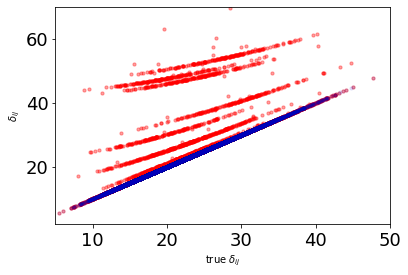

In [23]:
### Importance of dimension correction in higher dimension - Fig.4(C) Shepard Diagram
# (TODO: not exactly the same as in the manuscript)

out_dis_flat=out_dis_sq.flatten() # [200*200]
ori_dis_flat=ori_dis_sq.flatten()
corr_dis_flat=corr_dis_sq.flatten()

plt.figure()
SMALL_SIZE=18
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.scatter(ori_dis_flat,out_dis_flat,color='red',alpha=0.2,s=10)
plt.scatter(ori_dis_flat,corr_dis_flat,color='mediumblue',alpha=0.05,s=10)

plt.xlabel(r"true $\delta_{ij}$")
plt.ylabel(r'$\delta_{ij}$')
axes = plt.gca()
axes.set_xlim(5,50)
axes.set_ylim(2,70)

plt.show()


Section 2.1.4: Dimension correction in higher dimensions

In [50]:
# Read in dataset of main dimension 40
df_dim40 = pd.read_csv(r'datasets/bdd_synthetic_rdim40.csv',sep=';',header=None)
df_dim40.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.884310,9.628362,5.169816,0.593229,7.473802,1.040592,-3.361213,4.319038,2.255512,-6.438863,...,-5.167708,2.001932,1.956589,1.989807,2.008730,2.008140,1.978474,1.980495,2.031089,1.986115
1,3.390402,9.326640,-1.018645,0.480785,15.002497,12.726675,3.901818,-0.770232,-6.265948,-0.205683,...,-0.535279,2.009514,2.023822,1.976965,1.993956,2.019692,2.043539,1.993792,1.997134,1.998658
2,-5.827126,1.433676,2.763304,2.310429,12.083190,0.834956,-8.553036,8.645443,3.545084,-5.507355,...,-2.786968,2.005684,2.009829,1.973158,1.999259,2.005166,1.966800,2.006253,2.035410,1.971456
3,-0.347601,9.313045,-0.935694,2.791431,10.878105,-2.155244,7.303944,15.369113,3.434099,-9.985260,...,-2.225893,2.014265,1.973752,2.012823,2.003235,1.991552,2.005548,2.002062,1.971840,1.992611
4,0.697985,7.501421,5.325336,-3.974733,3.884708,11.123890,-2.984561,14.891479,3.229103,-1.856002,...,-1.092032,1.991126,1.978970,1.981129,2.006157,1.981203,2.038480,1.991013,2.000421,2.016908


In [51]:
props = np.arange(0, 0.14, 0.02)
dim_pred_diff = []
dim_raw_diff= []
true_dim = 40
num_components = 50
for prop in props:
    df_outlier = sim_outliers(df_dim40, prop, 38, 50)
    out_dis=pdist(df_outlier) # pairwise distance in tab (with outliers added)
    out_dis_sq=squareform(out_dis) # squared matrix form of D
    subspace_dim, _ = find_subspace_dim(out_dis_sq, 30, df_outlier.shape[1])
    dim_pred_diff.append(subspace_dim - true_dim)
    dim_raw_diff.append(rdim+int(round(subspace_dim * prop)) - true_dim)
    print("true_dim is:", true_dim)

KeyboardInterrupt: 

In [26]:
plt.figure()
plt.plot(props, dim_pred_diff, c="red")
plt.plot(props, dim_raw_diff, c="blue")
plt.xticks(props)
plt.show()